<a href="https://colab.research.google.com/github/ju-ing/temp_ml_study/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B3%BC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%B4%9D%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card Fraud Detection

## Load Data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA


In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Missing Values

In [7]:
df_fill = df.interpolate()
df_fill.isnull().sum().value_counts()

0    31
Name: count, dtype: int64

In [8]:
y = df_fill['Class']

In [9]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
df_fill.select_dtypes('number').columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
num_col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

## Split Data

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_fill[num_col], y, test_size=0.3, random_state=1000, stratify=y)

## Data Preprocessing - StandardScaler






In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train[num_col])
train_scaled = scaler.transform(x_train[num_col])
test_scaled = scaler.transform(x_test[num_col])
print(train_scaled.shape, test_scaled.shape)

(199364, 29) (85443, 29)


In [14]:
train_scaled

array([[ 0.62539845, -0.31558064,  0.50003822, ...,  0.19625056,
         0.05381621, -0.35271904],
       [ 1.03596745,  0.12655227, -0.90586978, ..., -0.23845777,
        -0.10041601, -0.32445882],
       [ 1.00767234, -0.16471114, -0.48990617, ...,  0.06931022,
        -0.09565296, -0.23911215],
       ...,
       [-0.11188193,  0.47801879,  0.35160316, ...,  0.22726392,
         0.35556878, -0.24028461],
       [-1.26778321,  1.81455803, -1.9032896 , ...,  1.28321855,
        -0.2645594 , -0.35057627],
       [-0.19612497,  0.86853901,  0.5185054 , ...,  0.27378662,
         0.53043023, -0.35065713]])

## Make DataFrame

In [15]:
train_scaled_df = pd.DataFrame(train_scaled,columns=x_train[num_col].columns)
test_scaled_df = pd.DataFrame(test_scaled,columns=x_test[num_col].columns)
train_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.625398,-0.315581,0.500038,-0.636278,-0.833108,-0.261963,-0.651925,0.190430,1.669963,-0.796956,...,-0.268411,-0.002279,0.182519,-0.108439,-0.036426,0.883814,-1.402862,0.196251,0.053816,-0.352719
1,1.035967,0.126552,-0.905870,0.536597,0.119642,-0.864848,0.048713,-0.257802,1.701237,-0.673183,...,-0.329529,-0.661858,-1.521266,0.660147,1.601460,-0.725349,0.214535,-0.238458,-0.100416,-0.324459
2,1.007672,-0.164711,-0.489906,0.133111,-0.324627,-0.758455,-0.037653,-0.174416,1.169109,-0.343610,...,-0.270327,-0.611858,-1.637567,0.683870,-0.178143,-0.757669,-2.249847,0.069310,-0.095653,-0.239112
3,0.017781,0.737849,-0.710596,0.301874,1.496402,0.102178,1.346267,-0.480475,-0.853439,0.693606,...,-0.037884,0.397577,1.443333,-0.402395,-0.269689,-1.472228,-1.231781,-0.648599,0.124012,-0.247602
4,-1.819134,1.853014,0.388897,-1.528366,-0.230209,-0.545247,0.702131,-0.259396,2.540310,3.553560,...,2.417109,-0.667744,-0.352527,0.094821,0.111694,0.385831,1.496630,2.575828,1.580842,-0.353649


## Dimensionality Reduction - PCA
* PCA vs t-SNE vs UMAP
* https://kwonkai.tistory.com/65





* 그래프를 그리면 알 수 있는 것
* 정말 두개 컬럼이 상관없는지
* class마다 점이 잘 분리가 되었는지
* 점들간에 분리가 잘 될수록  차원축소가 잘 된 것

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train_scaled_df)
train_pca = pca.transform(train_scaled_df)
test_pca = pca.transform(test_scaled_df)
print(train_pca.shape, test_pca.shape)

(199364, 2) (85443, 2)


In [17]:
y_test.value_counts()

Class
0    85295
1      148
Name: count, dtype: int64

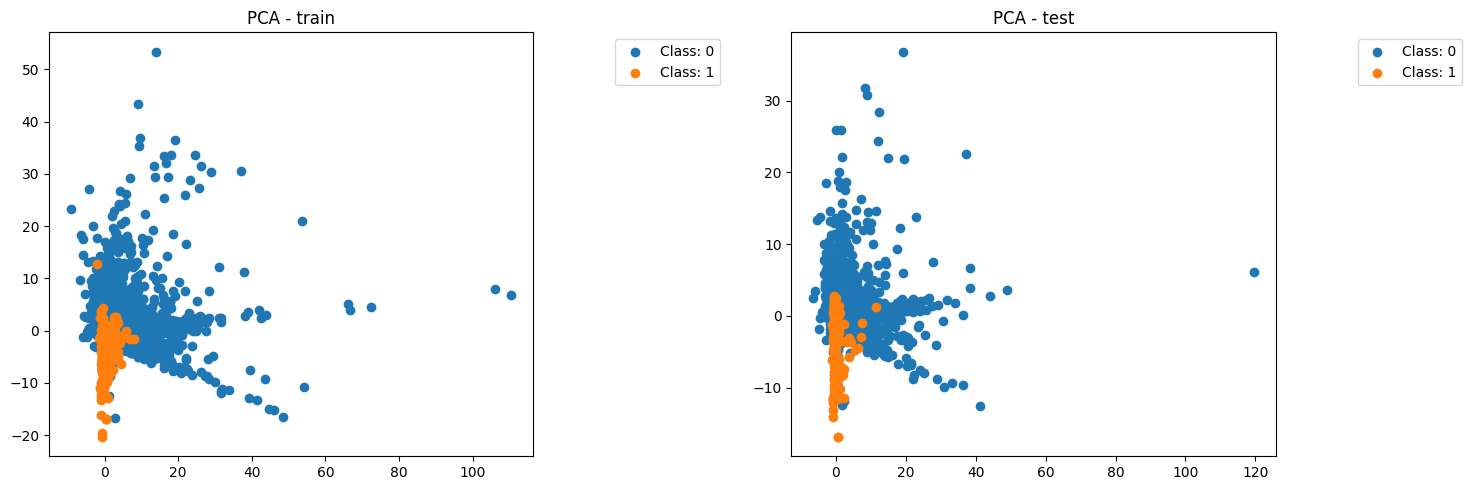

In [18]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2,figsize=(15,5))

axes[0].set_title('PCA - train')
for label in sorted(y_train.unique()):
    axes[0].scatter(train_pca[y_train == label, 0], train_pca[y_train == label, 1], label='Class: {}'.format(label))

axes[1].set_title('PCA - test')
for label in sorted(y_test.unique()):
    axes[1].scatter(test_pca[y_test == label, 0], test_pca[y_test == label, 1], label='Class: {}'.format(label))

axes[0].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.tight_layout()
plt.show()

## Dimensionality Reduction - t-SNE
* PCA후에 t-sne나 UMAP을 해야하는 이유
* 계산 효율성을 높이고, 데이터의 노이즈를 줄이며, t-SNE나 UMAP의 결과를 개선하는 데 도움을 줄 수 있다.




In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30.0, random_state=10, n_iter=250)
train_tsne = tsne.fit_transform(train_pca)
test_tsne = tsne.fit_transform(test_pca)
print(train_tsne.shape, test_tsne.shape)

KeyboardInterrupt: 

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

axes[0].set_title('t-SNE - train')
for label in sorted(y_train.unique()):
    axes[0].scatter(train_tsne[y_train == label, 0], train_tsne[y_train == label, 1], label='Class: {}'.format(label))

axes[1].set_title('t-SNE - test')
for label in sorted(y_test.unique()):
    axes[1].scatter(test_tsne[y_test == label, 0], test_tsne[y_test == label, 1], label='Class: {}'.format(label))

axes[0].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.tight_layout()
plt.show()

## Dimensionality Reduction - UMAP

In [ ]:
!pip install umap-learn

In [ ]:
import umap
umap_model = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.1, random_state=100)
train_umap = umap_model.fit_transform(train_pca)
test_umap = umap_model.transform(test_pca)
print(train_umap.shape, test_umap.shape)

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12,5))

axes[0].set_title('UMAP - train')
for label in sorted(y_train.unique()):
    axes[0].scatter(train_umap[y_train == label, 0], train_umap[y_train == label, 1], label='Class: {}'.format(label))

axes[1].set_title('UMAP - test')
for label in sorted(y_test.unique()):
    axes[1].scatter(test_umap[y_test == label, 0], test_umap[y_test == label, 1], label='Class: {}'.format(label))

axes[0].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(20,5))

axes[0].set_title('PCA')
for label in sorted(y_train.unique()):
    axes[0].scatter(train_pca[y_train == label, 0], train_pca[y_train == label, 1], label='Class: {}'.format(label))

axes[1].set_title('t-SNE')
for label in sorted(y_train.unique()):
    axes[1].scatter(train_tsne[y_train == label, 0], train_tsne[y_train == label, 1], label='Class: {}'.format(label))

axes[2].set_title('UMAP')
for label in sorted(y_train.unique()):
    axes[2].scatter(train_umap[y_train == label, 0], train_umap[y_train == label, 1],label='Class: {}'.format(label))

axes[0].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
axes[2].legend(loc='upper right', bbox_to_anchor=(1.4, 1))

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(20,5))

axes[0].set_title('PCA')
for label in sorted(y_test.unique()):
    axes[0].scatter(test_pca[y_test == label, 0], test_pca[y_test == label, 1], label='Class: {}'.format(label))

axes[1].set_title('t-SNE')
for label in sorted(y_test.unique()):
    axes[1].scatter(test_tsne[y_test == label, 0], test_tsne[y_test == label, 1], label='Class: {}'.format(label))

axes[2].set_title('UMAP')
for label in sorted(y_test.unique()):
    axes[2].scatter(test_umap[y_test == label, 0], test_umap[y_test == label, 1],label='Class: {}'.format(label))

axes[0].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
axes[2].legend(loc='upper right', bbox_to_anchor=(1.4, 1))

plt.tight_layout()
plt.show()

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_val , y_tr, y_val = train_test_split(train_pca,y_train,test_size=0.2,random_state=1000)

# RandomForest

Score는 PCA 처리 된것을  validation data로 나누어서 구한것이다.
RandomForest는 하이퍼파라미터 튜닝을 GridSearch와 RandomSearch로 각각 진행했기때문에 시간이 너무 오래걸려서
PCA로만 predict하였고 나머지 모델들은 PCA, t-SNE, UMAP 전부 각각 처리해서
predict하였다. Confusion Matrix는 PCA로만 작성하였다.



#Score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
rf.fit(x_tr,y_tr)
val_pred_rf = rf.predict(x_val)
val_pred_ratio_rf = rf.predict_proba(x_val)[:,1]

print('accuracy_score: {}'.format(accuracy_score(y_val,val_pred_rf)))
print('f1_score: {}'.format(f1_score(y_val,val_pred_rf)))
print('recall_score: {}'.format(recall_score(y_val,val_pred_rf)))
print('precision_score: {}'.format(precision_score(y_val,val_pred_rf)))
print('roc_auc_score: {}'.format(roc_auc_score(y_val,val_pred_ratio_rf)))

## Confusion Matrix

In [ ]:
cm = confusion_matrix(y_val, val_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#Tuning



RandomSearch가 GridSearch보다 속도가 빠르다.

## GridSearch

In [ ]:
param_grid = {
    'n_estimators': [1000, 500],
    'max_depth': [11, 9, 7, 5],   # 16 많이 잡아도
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
# 리소스 최적화를 위해 random search로 수정 가능함
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=3, refit=True, verbose=2)
grid_search.fit(train_pca, y_train)

print("Best parameters found by Grid Search for Random Forest:")
print(grid_search.best_params_)

## Predict - PCA





In [ ]:
rf = RandomForestClassifier(max_depth=10,min_samples_leaf=2,min_samples_split=5,n_estimators=100)
rf.fit(train_pca,y_train)
rf_grid_pred = rf.predict(test_pca)
print('accuracy_score : {}'.format(accuracy_score(y_test,rf_grid_pred)))
df = pd.DataFrame({'pred':rf_grid_pred})
df.to_csv('RandomForest_GridSearch.csv',index=False)
df.head()

## RandomSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, refit=True, verbose=2, random_state=42)
random_search.fit(train_pca, y_train)

print("Best parameters found by Random Search for Random Forest:")
print(random_search.best_params_)

## Predict - PCA

In [ ]:
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=7, min_samples_split=2, n_estimators=171)
rf.fit(train_pca,y_train)
rf_random_pred = rf.predict(test_pca)
df = pd.DataFrame({'pred':rf_random_pred})
df.to_csv('RandomForest_RandomSearch.csv',index=False)
df.head()

# XGBoost

In [ ]:
!pip install xgboost

##Score

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.2, verbose = 100)
xgb.fit(x_tr,y_tr)
val_pred_xgb = xgb.predict(x_val)
val_pred_ratio_xgb = xgb.predict_proba(x_val)[:,1]

print('accuracy_score: {}'.format(accuracy_score(y_val,val_pred_xgb)))
print('f1_score: {}'.format(f1_score(y_val,val_pred_xgb)))
print('recall_score: {}'.format(recall_score(y_val,val_pred_xgb)))
print('precision_score: {}'.format(precision_score(y_val,val_pred_xgb)))
print('roc_auc_score: {}'.format(roc_auc_score(y_val,val_pred_ratio_xgb)))

## Confusion Matrix

In [ ]:
cm = confusion_matrix(y_val, val_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Predict - PCA

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.2, verbose = 100)
xgb.fit(train_pca, y_train)
xgb_pred_pca = xgb.predict(test_pca)
print('accuracy_score : {}'.format(accuracy_score(y_test,xgb_pred_pca)))
df = pd.DataFrame({'pred':xgb_pred_pca})
df.to_csv('XGBoost_PCA.csv',index=False)
df.head()

##Predict - tSNE

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.2, verbose = 100)
xgb.fit(train_tsne, y_train, eval_set=[(test_tsne, y_test)], early_stopping_rounds=100, verbose = 100)
xgb_pred_tsne = xgb.predict(test_tsne)
print('accuracy_score : {}'.format(accuracy_score(y_test,xgb_pred_tsne)))
df = pd.DataFrame({'pred':xgb_pred_tsne})
df.to_csv('XGBoost_tSNE.csv',index=False)
df.head()

##Predict - UMAP

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.2, verbose = 100)
xgb.fit(train_umap, y_train, eval_set=[(test_umap, y_test)], early_stopping_rounds=100, verbose = 100)
xgb_pred_umap = xgb.predict(test_umap)
print('accuracy_score : {}'.format(accuracy_score(y_test,xgb_pred_umap)))
df = pd.DataFrame({'pred':xgb_pred_umap})
df.to_csv('XGBoost_UMAP.csv',index=False)
df.head()

#LightGBM

In [ ]:
!pip install lightgbm

##Score

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(num_leaves=30, objective='binary')
lgb.fit(x_tr, y_tr)
val_pred_lgb = lgb.predict(x_val)
val_pred_ratio_lgb = lgb.predict_proba(x_val)[:,1]

print('accuracy_score: {}'.format(accuracy_score(y_val,val_pred_lgb)))
print('f1_score: {}'.format(f1_score(y_val,val_pred_lgb)))
print('recall_score: {}'.format(recall_score(y_val,val_pred_lgb)))
print('precision_score: {}'.format(precision_score(y_val,val_pred_lgb)))
print('roc_auc_score: {}'.format(roc_auc_score(y_val,val_pred_ratio_lgb)))

## Confusion Matrix

In [ ]:
cm = confusion_matrix(y_val, val_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Predict - PCA

In [ ]:
lgb = LGBMClassifier(num_leaves=30, objective='binary')
lgb.fit(train_pca,y_train)
lgb_pred_pca = lgb.predict(test_pca)
print('accuracy_score : {}'.format(accuracy_score(y_test,lgb_pred_pca)))
df = pd.DataFrame({'pred':lgb_pred_pca})
df.to_csv('LightGBM_PCA.csv',index=False)
df.head()

##Predict - tSNE

In [ ]:
lgb = LGBMClassifier(num_leaves=30, objective='binary')
lgb.fit(train_tsne,y_train)
lgb_pred_tsne = lgb.predict(test_tsne)
print('accuracy_score : {}'.format(accuracy_score(y_test,lgb_pred_tsne)))
df = pd.DataFrame({'pred':lgb_pred_tsne})
df.to_csv('LightGBM_tSNE.csv',index=False)
df.head()

##Predict - UMAP

In [ ]:
lgb = LGBMClassifier(num_leaves=30, objective='binary')
lgb.fit(train_umap,y_train)
lgb_pred_umap = lgb.predict(test_umap)
print('accuracy_score : {}'.format(accuracy_score(y_test,lgb_pred_umap)))
df = pd.DataFrame({'pred':lgb_pred_umap})
df.to_csv('LightGBM_UMAP.csv',index=False)
df.head()

#CatBoost

In [ ]:
!pip install catboost

##Score

In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
cb.fit(x_tr,y_tr)
val_pred_cb = cb.predict(x_val)
val_pred_ratio_cb = cb.predict_proba(x_val)[:,1]
print('accuracy_score: {}'.format(accuracy_score(y_val,val_pred_cb)))
print('f1_score: {}'.format(f1_score(y_val,val_pred_cb)))
print('recall_score: {}'.format(recall_score(y_val,val_pred_cb)))
print('precision_score: {}'.format(precision_score(y_val,val_pred_cb)))
print('roc_auc_score: {}'.format(roc_auc_score(y_val,val_pred_ratio_cb)))

##Confusion Matrix

In [ ]:
cm = confusion_matrix(y_val, val_pred_cb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##Predict - PCA

In [ ]:
cb = CatBoostClassifier()
cb.fit(train_pca,y_train)
cb_pred_pca = cb.predict(test_pca)
print('accuracy_score : {}'.format(accuracy_score(y_test,cb_pred_pca)))
df = pd.DataFrame({'pred':cb_pred_pca})
df.to_csv('CatBoost_PCA.csv',index=False)
df.head()

##Predict - tSNE

In [ ]:
cb = CatBoostClassifier()
cb.fit(train_tsne,y_train, eval_set=(test_tsne, y_test), use_best_model=True)
cb_pred_tsne = cb.predict(test_tsne)
print('accuracy_score : {}'.format(accuracy_score(y_test,cb_pred_tsne)))
df = pd.DataFrame({'pred':cb_pred_tsne})
df.to_csv('CatBoost_tSNE.csv',index=False)
df.head()

##Predict - UMAP

In [ ]:
cb = CatBoostClassifier()
cb.fit(train_umap,y_train, eval_set=(test_umap, y_test), use_best_model=True)
cb_pred_umap = cb.predict(test_umap)
print('accuracy_score : {}'.format(accuracy_score(y_test,cb_pred_umap)))
df = pd.DataFrame({'pred':cb_pred_umap})
df.to_csv('CatBoost_UMAP.csv',index=False)
df.head()

# TensorFlow - PCA

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_pca, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred = model.predict(test_pca)
y_pred.shape

In [ ]:
y_pred

In [ ]:
y_pred_agmx_pca = tf.argmax(y_pred, axis=1)

In [ ]:
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred_agmx_pca)))

In [ ]:
df = pd.DataFrame({'pred': y_pred_agmx_pca})
df.to_csv('PCA_Tensorflow.csv',index=False)
df.head()

#TensorFlow - tSNE

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_tsne, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred = model.predict(test_tsne)
y_pred.shape

In [ ]:
y_pred

In [ ]:
y_pred_agmx_tsne = tf.argmax(y_pred, axis=1)

In [ ]:
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred_agmx_tsne)))

In [ ]:
df = pd.DataFrame({'pred': y_pred_agmx_tsne})
df.to_csv('t-SNE_Tensorflow.csv',index=False)
df.head()

#Tensorflow - UMAP

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_umap, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred = model.predict(test_umap)
y_pred.shape

In [ ]:
y_pred

In [ ]:
y_pred_agmx_umap = tf.argmax(y_pred, axis=1)

In [ ]:
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred_agmx_umap)))

In [ ]:
df = pd.DataFrame({'pred': y_pred_agmx_umap})
df.to_csv('UMAP_Tensorflow.csv',index=False)
df.head()

#Pytorch - PCA

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(train_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(test_pca, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class CreditCardNN(nn.Module):
    def __init__(self):
        super(CreditCardNN, self).__init__()
        self.layer1 = nn.Linear(X_train_tensor.shape[1], 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

model = CreditCardNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

model.eval()
y_pred_list = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        outputs = model(X_batch)
        _, y_pred = torch.max(outputs, 1)
        y_pred_list.append(y_pred)

y_pred_tensor = torch.cat(y_pred_list)
pth_y_pred_pca = y_pred_tensor.cpu().numpy()

accuracy = accuracy_score(y_test, pth_y_pred_pca)
print('accuracy: {}'.format(accuracy))

In [ ]:
df = pd.DataFrame({'pred':pth_y_pred_pca})
df.to_csv('PCA_Pytorch.csv',index=False)
df.head()

#Pytorch - tSNE

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(train_tsne, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(test_tsne, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class CreditCardNN(nn.Module):
    def __init__(self):
        super(CreditCardNN, self).__init__()
        self.layer1 = nn.Linear(X_train_tensor.shape[1], 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

model = CreditCardNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

model.eval()
y_pred_list = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        outputs = model(X_batch)
        _, y_pred = torch.max(outputs, 1)
        y_pred_list.append(y_pred)

y_pred_tensor = torch.cat(y_pred_list)
pth_y_pred_tsne = y_pred_tensor.cpu().numpy()

accuracy = accuracy_score(y_test, pth_y_pred_tsne)
print('accuracy: {}'.format(accuracy))

In [ ]:
df = pd.DataFrame({'pred':pth_y_pred_tsne})
df.to_csv('t-SNE_Pytorch.csv',index=False)
df.head()

#Pytorch - UMAP

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(train_umap, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(test_umap, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class CreditCardNN(nn.Module):
    def __init__(self):
        super(CreditCardNN, self).__init__()
        self.layer1 = nn.Linear(X_train_tensor.shape[1], 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

model = CreditCardNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

model.eval()
y_pred_list = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        outputs = model(X_batch)
        _, y_pred = torch.max(outputs, 1)
        y_pred_list.append(y_pred)

y_pred_tensor = torch.cat(y_pred_list)
pth_y_pred_umap = y_pred_tensor.cpu().numpy()

accuracy = accuracy_score(y_test, pth_y_pred_umap)
print('accuracy: {}'.format(accuracy))

In [ ]:
df = pd.DataFrame({'pred':pth_y_pred_umap})
df.to_csv('UMAP_Pytorch.csv',index=False)
df.head()

## Compare

In [ ]:
df = pd.DataFrame({
    'Model': ['RF_GS_PCA', 'RF_RS_PCA', 'XGB_PCA', 'LGBM_PCA', 'CB_PCA', 'Tensorflow_PCA', 'Pytorch_PCA',
              'XGB_tSNE', 'LGBM_tSNE', 'CB_tSNE', 'Tensorflow_tSNE', 'Pytorch_tSNE', 'XGB_UMAP', 'LGBM_UMAP',
              'CB_UMAP', 'Tensorflow_UMAP', 'Pytorch_UMAP'],
    'Score': [accuracy_score(y_test, rf_grid_pred), accuracy_score(y_test, rf_random_pred), accuracy_score(y_test, xgb_pred_pca),
              accuracy_score(y_test, lgb_pred_pca), accuracy_score(y_test, cb_pred_pca), accuracy_score(y_test, y_pred_agmx_pca),
              accuracy_score(y_test, pth_y_pred_pca), accuracy_score(y_test, xgb_pred_tsne), accuracy_score(y_test, lgb_pred_tsne),
              accuracy_score(y_test, cb_pred_tsne), accuracy_score(y_test, y_pred_agmx_tsne), accuracy_score(y_test, pth_y_pred_tsne),
              accuracy_score(y_test, xgb_pred_umap), accuracy_score(y_test, lgb_pred_umap), accuracy_score(y_test, cb_pred_umap),
              accuracy_score(y_test, y_pred_agmx_umap), accuracy_score(y_test, pth_y_pred_umap)]
})
df.sort_values(by='Score',ascending=False)

# Augmentation - SMOTE

In [ ]:
!pip install xgboost
!pip install lightgbm
!pip install catboost
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(sampling_strategy=0.3)
x_st, y_st = smt.fit_resample(train_scaled_df, y_train)

##Predict - RandomForest

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_st,y_st)
y_pred_rf_st = rf.predict(test_scaled_df)
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred_rf_st)))

In [ ]:
df = pd.DataFrame({'pred':y_pred_rf_st})
df.to_csv('SMOTE_RandomForest.csv',index=False)
df.head()

#Predict - XGBoost

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.2, verbose = 100)
xgb.fit(x_st,y_st, eval_set=[(test_scaled_df, y_test)], early_stopping_rounds=100)
y_pred_xgb_st = xgb.predict(test_scaled_df)
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred_xgb_st)))

In [ ]:
df = pd.DataFrame({'pred':y_pred_xgb_st})
df.to_csv('SMOTE_XGBoost.csv',index=False)
df.head()

## Predict- LightGBM

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(num_leaves=30, objective='binary')
lgbm.fit(x_st, y_st)
y_pred_lgbm_st = lgbm.predict(test_scaled_df)
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred_lgbm_st)))

In [ ]:
df = pd.DataFrame({'pred':y_pred_lgbm_st})
df.to_csv('SMOTE_LightGBM.csv',index=False)
df.head()

##Predict - CatBoost

In [ ]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier()
catboost_model.fit(
    x_st, y_st,
    eval_set=(test_scaled_df, y_test),
    early_stopping_rounds=10
)
y_pred_cb_st = catboost_model.predict(test_scaled_df)
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred_cb_st)))

In [ ]:
df = pd.DataFrame({'pred':y_pred_cb_st})
df.to_csv('SMOTE_CatBoost.csv',index=False)
df.head()

#Augmentation - BorderLineSMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
bdsmt = BorderlineSMOTE(sampling_strategy=0.3, n_jobs=-1)
x_border, y_border = bdsmt.fit_resample(train_scaled_df, y_train)

#Predict - RandomForest

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_border,y_border)
y_pred_rf_bl = rf.predict(test_scaled_df)
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred_rf_bl)))

In [ ]:
df = pd.DataFrame({'pred':y_pred_rf_bl})
df.to_csv('BLS_RandomForest.csv',index=False)
df.head()

#Predict - XGBoost

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.2, verbose = 100)
xgb.fit(x_border,y_border, eval_set=[(test_scaled_df, y_test)], early_stopping_rounds=100)
y_pred_xgb_bl = xgb.predict(test_scaled_df)
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred_xgb_bl)))

In [ ]:
df = pd.DataFrame({'pred':y_pred_xgb_bl})
df.to_csv('BLS_XGBoost.csv',index=False)
df.head()

## Predict - LightGBM

In [ ]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(num_leaves=30, objective='binary')
lgbm_model.fit(x_border, y_border)
y_pred_lgbm_bl = lgbm_model.predict(test_scaled_df)
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred_lgbm_bl)))

In [ ]:
df = pd.DataFrame({'pred':y_pred_lgbm_bl})
df.to_csv('Border_LightGBM.csv',index=False)
df.head()

## Predict - Catboost

In [ ]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier()
catboost_model.fit(
    x_border, y_border,
    eval_set=(test_scaled_df, y_test),
    early_stopping_rounds=10
)
y_pred_cb_bl = catboost_model.predict(test_scaled_df)
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred_cb_bl)))

In [ ]:
df = pd.DataFrame({'pred':y_pred_cb_bl})
df.to_csv('Border_CatBoost.csv',index=False)
df.head()

## Augmentation - ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy=0.3, n_jobs=-1)
x_ads, y_ads = adasyn.fit_resample(train_scaled_df, y_train)

#Predict - RandomForest

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_ads,y_ads)
y_pred_rf_ads = rf.predict(test_scaled_df)
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred_rf_ads)))

In [ ]:
df = pd.DataFrame({'pred':y_pred_rf_ads})
df.to_csv('ADASYN_RandomForest.csv',index=False)
df.head()

#Predict - XGBoost

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.2, verbose = 100)
xgb.fit(x_ads,y_ads, eval_set=[(test_scaled_df, y_test)], early_stopping_rounds=100)
y_pred_xgb_ads = xgb.predict(test_scaled_df)
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred_xgb_ads)))

In [ ]:
df = pd.DataFrame({'pred':y_pred_xgb_ads})
df.to_csv('ADASYN_XGBoost.csv',index=False)
df.head()

##Predict - LightGBM

In [ ]:
lgbm_model = LGBMClassifier(num_leaves=30, objective='binary')
lgbm_model.fit(x_ads, y_ads)
y_pred_lgbm_ads = lgbm_model.predict(test_scaled_df)
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred_lgbm_ads)))

In [ ]:
df = pd.DataFrame({'pred':y_pred_lgbm_ads})
df.to_csv('ADASYN_LightGBM.csv',index=False)
df.head()

##Predict - CatBoost

In [ ]:
catboost_model = CatBoostClassifier()
catboost_model.fit(
    x_ads, y_ads,
    eval_set=(test_scaled, y_test),
    early_stopping_rounds=10
)
y_pred_cb_ads = catboost_model.predict(test_scaled_df)
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred_cb_ads)))

In [ ]:
df = pd.DataFrame({'pred':y_pred_cb_ads})
df.to_csv('ADASYN_CatBoost.csv',index=False)
df.head()

# TensorFlow - SMOTE

1. 만약 내가 갖고있는 y 가 단일 벡터 [0, 1, 3, 4, 0, 0, 0, 1, 1] 이라면 --> `sparse_categorical_crossentropy`

2. 만약 내가 갖고있는 y 가  원핫 인코딩 되어있다면 --> `categorical_crossentropy`

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_st, y_st, epochs=10, batch_size=32, validation_split=0.2)
y_pred = model.predict(test_scaled_df)
y_pred.shape

In [ ]:
y_pred_agmx_st = tf.argmax(y_pred, axis=1)

In [ ]:
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred_agmx_st)))

In [ ]:
df = pd.DataFrame({'pred': y_pred_agmx_st})
df.to_csv('SMOTE_Tensorflow.csv',index=False)
df.head()

#TensorFlow - BorderLineSMOTE

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_border, y_border, epochs=10, batch_size=32, validation_split=0.2)
y_pred = model.predict(test_scaled_df)
y_pred.shape

In [ ]:
y_pred_agmx_bls = tf.argmax(y_pred, axis=1)

In [ ]:
print('accuracy_score : {}'.format(accuracy_score(y_test, y_pred_agmx_bls)))

In [ ]:
df = pd.DataFrame({'pred': y_pred_agmx_bls})
df.to_csv('BorderLineSMOTE_Tensorflow.csv',index=False)
df.head()

#TensorFlow - ADASYN

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_ads, y_ads, epochs=10, batch_size=32, validation_split=0.2)
y_pred = model.predict(test_scaled_df)
y_pred.shape

In [ ]:
y_pred_agmx_ads = tf.argmax(y_pred, axis=1)

In [ ]:
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred_agmx_ads)))

In [ ]:
df = pd.DataFrame({'pred': y_pred_agmx_ads})
df.to_csv('ADASYN_Tensorflow.csv',index=False)
df.head()

# Pytorch - SMOTE

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(x_st.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_st.values, dtype=torch.long)
X_test_tensor = torch.tensor(test_scaled_df.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class CreditCardNN(nn.Module):
    def __init__(self):
        super(CreditCardNN, self).__init__()
        self.layer1 = nn.Linear(X_train_tensor.shape[1], 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

model = CreditCardNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

model.eval()
y_pred_list = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        outputs = model(X_batch)
        _, y_pred = torch.max(outputs, 1)
        y_pred_list.append(y_pred)

y_pred_tensor = torch.cat(y_pred_list)
pth_y_pred_st = y_pred_tensor.detach().cpu().numpy()

accuracy = accuracy_score(y_test, pth_y_pred_st)
print('accuracy: {}'.format(accuracy))

In [ ]:
df = pd.DataFrame({'pred':pth_y_pred_st})
df.to_csv('SMOTE_Pytorch.csv',index=False)
df.head()

#Pytorch - BorderLineSMOTE

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(x_border.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_border.values, dtype=torch.long)
X_test_tensor = torch.tensor(test_scaled_df.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class CreditCardNN(nn.Module):
    def __init__(self):
        super(CreditCardNN, self).__init__()
        self.layer1 = nn.Linear(X_train_tensor.shape[1], 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

model = CreditCardNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

model.eval()
y_pred_list = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        outputs = model(X_batch)
        _, y_pred = torch.max(outputs, 1)
        y_pred_list.append(y_pred)

y_pred_tensor = torch.cat(y_pred_list)
pth_y_pred_bls = y_pred_tensor.detach().cpu().numpy()

accuracy = accuracy_score(y_test, pth_y_pred_bls)
print('accuracy: {}'.format(accuracy))

In [ ]:
df = pd.DataFrame({'pred':pth_y_pred_bls})
df.to_csv('BorderLineSMOTE_Pytorch.csv',index=False)
df.head()

#Pytorch - ADASYN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(x_ads.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_ads.values, dtype=torch.long)
X_test_tensor = torch.tensor(test_scaled_df.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class CreditCardNN(nn.Module):
    def __init__(self):
        super(CreditCardNN, self).__init__()
        self.layer1 = nn.Linear(X_train_tensor.shape[1], 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

model = CreditCardNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

model.eval()
y_pred_list = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        outputs = model(X_batch)
        _, y_pred = torch.max(outputs, 1)
        y_pred_list.append(y_pred)

y_pred_tensor = torch.cat(y_pred_list)
pth_y_pred_ads = y_pred_tensor.detach().cpu().numpy()

accuracy = accuracy_score(y_test, pth_y_pred_ads)
print('accuracy: {}'.format(accuracy))

In [ ]:
df = pd.DataFrame({'pred':pth_y_pred_ads})
df.to_csv('ADASYN_Pytorch.csv',index=False)
df.head()

## Compare

In [ ]:
df = pd.DataFrame({
    'Model': [
        'RF_SMOTE', 'XGB_SMOTE', 'LGBM_SMOTE', 'CB_SMOTE', 'TensorFlow_SMOTE', 'Pytorch_SMOTE',
        'RF_BLS', 'XGB_BLS', 'LGBM_BLS', 'CB_BLS',
        'TensorFlow_BLS', 'Pytorch_BLS', 'RF_ADASYN', 'XGB_ADASYN', 'LGBM_ADASYN',
        'CB_ADASYN', 'TensorFlow_ADASYN', 'Pytorch_ADASYN'
    ],
    'Score': [
        accuracy_score(y_test, y_pred_rf_st), accuracy_score(y_test, y_pred_xgb_st), accuracy_score(y_test, y_pred_lgbm_st),
        accuracy_score(y_test, y_pred_cb_st), accuracy_score(y_test, y_pred_agmx_st), accuracy_score(y_test, pth_y_pred_st),
        accuracy_score(y_test, y_pred_rf_bl), accuracy_score(y_test, y_pred_xgb_bl), accuracy_score(y_test, y_pred_lgbm_bl),
        accuracy_score(y_test, y_pred_cb_bl), accuracy_score(y_test, y_pred_agmx_bls), accuracy_score(y_test, pth_y_pred_bls),
        accuracy_score(y_test, y_pred_rf_ads), accuracy_score(y_test, y_pred_xgb_ads), accuracy_score(y_test, y_pred_lgbm_ads),
        accuracy_score(y_test, y_pred_cb_ads), accuracy_score(y_test, y_pred_agmx_ads), accuracy_score(y_test, pth_y_pred_ads)
    ]
})

sorted_df = df.sort_values(by='Score', ascending=False)
sorted_df

---